In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [6]:
# Read the data from the CSV file using NumPy
data = np.genfromtxt("0_and_1.csv", delimiter=',', skip_header=1)



In [9]:
# Extract the target variable Y and reshape it
Y = data[:, 0]
print(Y)
Y = ...

# Remove the label column from X and transpose the matrix
X = ...

[1. 0. 1. ... 1. 0. 1.]


In [ ]:
# Print the shape of Y and X
print("X", X.shape)
print("Y", Y.shape)

X (784, 8816)
Y (1, 8816)


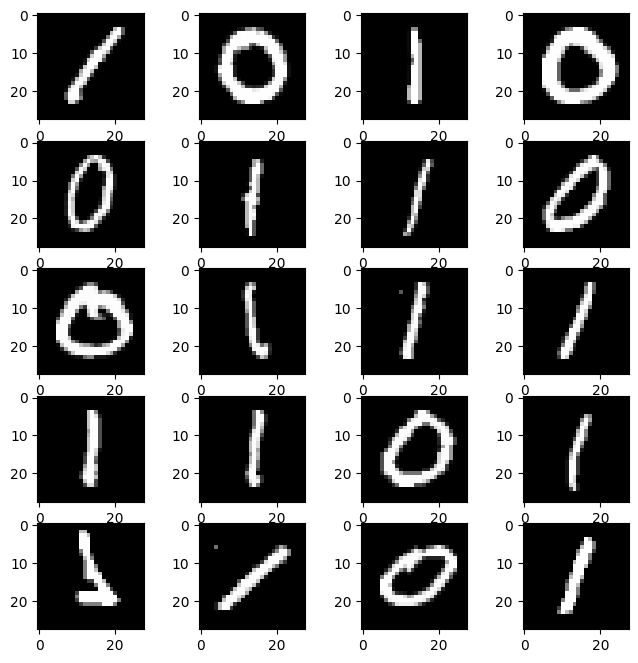

In [ ]:
# Create a figure to plot the images
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

# Loop through and display each image
for i in range(1, columns * rows + 1):
    X1 = ...  # Extract the i-th column (i-th image)
    X1 = ...  # Reshape the flattened image to (28, 28)
    fig.add_subplot(rows, columns, i)  # Add a subplot to the figure
    plt.imshow(X1, cmap='gray')  # Display the image using a grayscale colormap

# Show the plot
plt.show()

In [ ]:
import numpy as np

def sigmoid(x, derivative=False):
    """
    Compute the sigmoid function or its derivative.

    :param x: Input value or array.
    :param derivative: If True, compute the derivative of the sigmoid function.
    :return: Sigmoid function or its derivative.
    """
    ...

In [ ]:
print(sigmoid(0))                   # Output: 0.5
print(sigmoid(0, derivative=True))  # Output: 0.25

0.5
0.25


In [ ]:
def network_architecture(X, Y):
    # Number of nodes in the input layer
    n_x = ...
    # Number of nodes in the hidden layer
    n_h = ...
    # Number of nodes in the output layer
    n_y = ...
    return (n_x, n_h, n_y)

# Get the network architecture dimensions
n_x, n_h, n_y = network_architecture(X, Y)

# Print the number of nodes in each layer
print("Number of nodes in input layer (n_x):", n_x)
print("Number of nodes in hidden layer (n_h):", n_h)
print("Number of nodes in output layer (n_y):", n_y)

Number of nodes in input layer (n_x): 784
Number of nodes in hidden layer (n_h): 10
Number of nodes in output layer (n_y): 1


In [ ]:
def define_network_parameters(n_x, n_h, n_y):
    # Initialize weights and biases for the first layer
    W1 = np.random.randn(n_h, n_x) * 0.01  # Random initialization with small values
    b1 = ...  # Initialize biases with zeros

    # Initialize weights and biases for the second layer
    W2 = ...                              # Random initialization with small values
    b2 = ...  # Initialize biases with zeros

    # Store the parameters in a dictionary
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parameters

In [ ]:
# Get the neural network architecture dimensions
n_x, n_h, n_y = network_architecture(X, Y)

# Define the network parameters using the obtained dimensions
params = define_network_parameters(n_x, n_h, n_y)

In [ ]:
# Recall that Z = W*X + b & A = g(Z)

# Define the forward propagation function
def forward_propagation(X, params):
    # Calculate the weighted sum and apply activation function for the first layer
    Z1 = ...
    A1 = ...

    # Calculate the weighted sum and apply activation function for the second layer
    Z2 = ...
    A2 = ...

    # Return the calculated intermediate results
    return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

In [ ]:
# Perform forward propagation
refor = forward_propagation(X, params)

# Print the shapes of the intermediate variables
print("Z1", refor['Z1'].shape)
print("A1", refor['A1'].shape)
print("Z2", refor['Z2'].shape)
print("A2", refor['A2'].shape)

Z1 (10, 8816)
A1 (10, 8816)
Z2 (1, 8816)
A2 (1, 8816)


In [ ]:
def backward_propagation(params, activations, X, Y):
    """
    Compute the derivatives of the loss with respect to the parameters using backpropagation.

    :param params: Dictionary containing the current parameters.
    :param activations: Dictionary containing the intermediate activations during forward propagation.
    :param X: Input data.
    :param Y: True labels.
    :return: Dictionary containing the derivatives of the loss with respect to the parameters.
    """
    m = X.shape[1]  # Number of training examples

    # Output layer
    dZ2 = ...
    dW2 = ...
    db2 = ...

    # Hidden layer
    dZ1 = ...
    dW1 = ...
    db1 = ...

    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}


def update_parameters(params, derivatives, alpha=0.1):
    """
    Update the parameters using gradient descent.

    :param params: Dictionary containing the current parameters.
    :param derivatives: Dictionary containing the derivatives of the loss with respect to the parameters.
    :param alpha: Learning rate.
    :return: Updated parameters.
    """
    params['W1'] = ...
    params['b1'] = ...
    params['W2'] = ...
    params['b2'] = ...
    return params

In [ ]:
# Update the parameters using gradient descent and print the updated parameters

# Calculate the derivatives using backward propagation
derivatives = backward_propagation(params, refor, X, Y)

# Update the parameters using the derivatives and learning rate
params = update_parameters(params, derivatives)

# Print the updated parameters
print(params)

In [ ]:
def compute_error(Predicted, Actual):
    """
    Compute the mean squared error between predicted values and actual values.

    :param Predicted: Predicted values.
    :param Actual: Actual values.
    :return: Mean squared error.
    """
    ...

In [ ]:
def neural_network(X, Y, num_iterations=10):
    """
    Train a neural network model using gradient descent.

    :param X: Input data.
    :param Y: Target data.
    :param num_iterations: Number of iterations for training.
    :return: Trained parameters and cost history.
    """
    ...

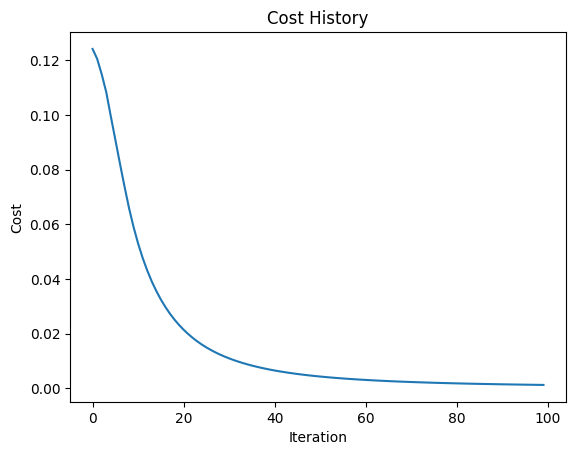

In [ ]:
# Train the neural network model and retrieve the trained parameters and cost history
model, cost = neural_network(X, Y, num_iterations=100)

# Plot the cost history
...

In [ ]:
def predict(parameters, X):
    # Perform forward propagation to get the results
    results = forward_propagation(X, parameters)

    # Round the predictions to 0 or 1
    predictions = np.around(results['A2'])

    return predictions

# Make predictions using the trained model
predictions = predict(model, X)

In [ ]:
# Initialize an empty list to store the indices of misclassified examples
Error = []

...

# Print the indices of misclassified examples
print("Indices of misclassified examples:", Error)

# Calculate the accuracy by subtracting the ratio of misclassified examples from 1 and multiplying by 100
accuracy = ((X.shape[0] - len(Error)) / X.shape[0]) * 100

# Print the accuracy as a percentage
print("Accuracy: {:f}%".format(accuracy))

Indices of misclassified examples: [332, 1364, 7653]
Accuracy: 99.617347%


In [3]:
#Display misclassified images
...